# Wine Review analysis and variety prediction
Shashank R <br>
CSE, RNSIT

# Loading the Dataset

In [156]:
import pandas as pd
import pickle
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('stopwords')
df1 = pd.read_csv('train.csv')

df1.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [157]:
df1 = df1.drop(['user_name','region_2'],axis='columns')
df1 = df1.dropna()


In [158]:
target = pd.DataFrame(df1['variety'])
#target = df1['variety']
inputs = df1.drop('variety', axis='columns')
target.head()

,variety
0,Chardonnay
2,Nebbiolo
3,Bordeaux-style White Blend
4,Malbec
5,Cabernet Sauvignon


# Data preprocessing 
Label Encoding, Feature extracting from text using TFIDF Vectorizer

In [159]:
le_country = LabelEncoder()
le_designation = LabelEncoder()
le_province = LabelEncoder()
le_region_1 = LabelEncoder()
le_winery = LabelEncoder()
le_variety = LabelEncoder()
inputs['country'] = inputs['country'].fillna('Something')
inputs['review_title'] = inputs['review_title'].fillna(' ')
inputs['review_description'] = inputs['review_description'].fillna(' ')
inputs['country_n'] = le_country.fit_transform(inputs['country'])
inputs['designation'] = inputs['designation'].fillna('Something')
inputs['designation_n'] = le_designation.fit_transform(inputs['designation'])
inputs['province'] = inputs['province'].fillna('Something')
inputs['province_n'] = le_province.fit_transform(inputs['province'])
inputs['region_1'] = inputs['region_1'].fillna('Something')
inputs['region_n'] = le_region_1.fit_transform(inputs['region_1'])
inputs['winery'] = inputs['winery'].fillna('Something')
inputs['winery_n'] = le_winery.fit_transform(inputs['winery'])
target['variety'] = target['variety'].fillna('Something')
target['variety_n'] = le_variety.fit_transform(target['variety'])

inputs = inputs.drop(['country','designation','province','region_1','winery'],axis='columns')
target = target.drop('variety',axis='columns')
inputs.head()

,review_title,review_description,points,price,country_n,designation_n,province_n,region_n,winery_n
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,1,13808,3,747,245
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,4,4252,44,54,6326
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,3,9613,51,73,2981
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,3,10468,15,839,2029
5,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",85,13.0,0,7164,42,688,235


In [160]:
def add_feature(X, feature_to_add):
    """
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    """
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [161]:
inputs['review'] = inputs['review_title'] + ' ' + inputs['review_description']
stop_words = set(stopwords.words('english'))
#reviews = [w for w in nltk.word_tokenize(reviews) if w.isalpha() == True and len(w)>3 and not w in stop_words]
#reviews = ' '.join(reviews)
inputs['review'] = inputs['review'].apply(lambda x: ' '.join([w for w in nltk.word_tokenize(x) if w.isalpha() == True and len(w)>3 and not w in stop_words]))
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=3, max_features=500).fit(inputs['review'])
X_train_vectorized = vect.transform(inputs['review'])




In [162]:



X_train_vectorized_added = add_feature(X_train_vectorized, inputs['country_n'])
X_train_vectorized_added = add_feature(X_train_vectorized_added, inputs['points'])
X_train_vectorized_added = add_feature(X_train_vectorized_added, inputs['price'])
X_train_vectorized_added = add_feature(X_train_vectorized_added, inputs['designation_n'])
X_train_vectorized_added = add_feature(X_train_vectorized_added, inputs['region_n'])
X_train_vectorized_added = add_feature(X_train_vectorized_added, inputs['winery_n'])
X_train_vectorized_added = add_feature(X_train_vectorized_added, inputs['province_n'])

inputs

,review_title,review_description,points,price,country_n,designation_n,province_n,region_n,winery_n,review
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",83,10.0,1,13808,3,747,245,Andrew Peace Peace Family Vineyard Chardonnay ...
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,94,80.0,4,4252,44,54,6326,Renato Ratti Conca Barolo Barolo Conca opens i...
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,87,22.0,3,9613,51,73,2981,Domaine Cure White Bergerac impressive small a...
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",88,33.0,3,10468,15,839,2029,Château Cèdre Cèdre Vintage Malbec Liqueur Thi...
5,Andean 2005 Finca La Escondida Reserva Caberne...,"Strident aromas of licorice, herbs, berries an...",85,13.0,0,7164,42,688,235,Andean Finca Escondida Reserva Cabernet Sauvig...
...,...,...,...,...,...,...,...,...,...,...
82646,Domaine de Cause 2012 Notre Dame des Champs Ma...,"This cuvée, named after a statue in the vineya...",91,65.0,3,13088,51,110,2865,Domaine Cause Notre Dame Champs Malbec Cahors ...
82652,Montecillo 2007 Crianza (Rioja),"Hot earth, baked cherry and mild vanilla aroma...",84,12.0,5,4549,38,633,5427,Montecillo Crianza Rioja earth baked cherry mi...
82653,Vivác Winery 2008 Single Vineyard Cabernet Sau...,"Pungent, high-pitched notes of turmeric and dr...",85,21.0,6,16909,33,550,7842,Vivác Winery Single Vineyard Cabernet Sauvigno...
82654,Domaine de la Madone 2014 Nouveau (Beaujolais...,This is a wine that's not just lively and frui...,87,14.0,3,13093,4,64,2915,Domaine Madone Nouveau This wine lively fruity...


# Splitting the training data and training the model

In [167]:
from sklearn.model_selection import train_test_split
XTrain,XTest,YTrain,YTest = train_test_split(X_train_vectorized_added,target,test_size=0.2)
XTrain


<36207x507 sparse matrix of type '<class 'numpy.float64'>'
	with 927195 stored elements in Compressed Sparse Row format>

In [168]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=250)
model.fit(XTrain,YTrain)
model.score(XTest,YTest)


C:\Users\Shashank\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.930181175430844

In [172]:
#save model

Pkl_Filename = "D://Models//WineClassification.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [104]:
#read model
Pkl_Filename = "D://Models//WineClassification.pkl" 
with open(Pkl_Filename, 'rb') as file:  
    model = pickle.load(file)

# Predicting wine variety for new data

In [169]:
dfTest = pd.read_csv('test.csv')
dfTest.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [170]:

dfT = dfTest.copy()
dfT = dfT.drop(['user_name','region_2'],axis='columns')
dfT = dfT.dropna()
dfT1 = dfT.copy()
dfT['review_title'] = dfT['review_title'].fillna(' ')
dfT['review_description'] = dfT['review_description'].fillna(' ')
dfT['country'] = dfT['country'].fillna('Something')
dfT['country_n'] = le_country.fit_transform(dfT['country'])
dfT['designation'] = dfT['designation'].fillna('Something')
dfT['designation_n'] = le_designation.fit_transform(dfT['designation'])
dfT['province'] = dfT['province'].fillna('Something')
dfT['province_n'] = le_province.fit_transform(dfT['province'])
dfT['region_1'] = dfT['region_1'].fillna('Something')
dfT['region_n'] = le_region_1.fit_transform(dfT['region_1'])
dfT['winery'] = dfT['winery'].fillna('Something')
dfT['winery_n'] = le_winery.fit_transform(dfT['winery'])
dfT = dfT.drop(['country','designation','province','region_1','winery'],axis='columns')

dfT['review'] = dfT['review_title'] + ' ' + dfT['review_description']
stop_words = set(stopwords.words('english'))
#reviews = [w for w in nltk.word_tokenize(reviews) if w.isalpha() == True and len(w)>3 and not w in stop_words]
#reviews = ' '.join(reviews)
dfT['review'] = dfT['review'].apply(lambda x: ' '.join([w for w in nltk.word_tokenize(x) if w.isalpha() == True and len(w)>3 and not w in stop_words]))
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(min_df=3, max_features=500).fit(dfT['review'])
X_test_vectorized = vect.transform(dfT['review'])

X_test_vectorized_added = add_feature(X_test_vectorized, dfT['country_n'])
X_test_vectorized_added = add_feature(X_test_vectorized_added, dfT['points'])
X_test_vectorized_added = add_feature(X_test_vectorized_added, dfT['price'])
X_test_vectorized_added = add_feature(X_test_vectorized_added, dfT['designation_n'])
X_test_vectorized_added = add_feature(X_test_vectorized_added, dfT['region_n'])
X_test_vectorized_added = add_feature(X_test_vectorized_added, dfT['winery_n'])
X_test_vectorized_added = add_feature(X_test_vectorized_added, dfT['province_n'])

predictions = model.predict(X_test_vectorized_added)
predictions = le_variety.inverse_transform(predictions)
#dfT1 = dfT1.merge(dfTest[['user_name','region_2']])
dfT1 =dfT1.merge(dfTest[['user_name','region_2']], left_index=True, right_index=True, how='inner')
dfT1['variety'] = predictions
cols = dfT1.columns.tolist()
cols = ['user_name','country','review_title','review_description','designation','points','price','province','region_1','region_2','winery','variety']
dfT1 = dfT1[cols]
dfT1.to_csv('output.csv')
dfT1.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Champagne Blend
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Merlot
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Merlot
5,NaN,US,Mount Pleasant Winery NV Villagio Off Dry Whit...,The timid nose squeaks out notes of Chinese fi...,Villagio Off Dry,82,9.0,Missouri,Missouri,NaN,Mount Pleasant Winery,Syrah
9,@kerinokeefe,Italy,Contadi Castaldi NV Rosé Sparkling (Franciacorta),"A blend of 65% Chardonnay and 35% Pinot Nero, ...",Rosé,88,24.0,Lombardy,Franciacorta,NaN,Contadi Castaldi,Sparkling Blend


# Exploratory Data Analysis

1. Tokenizing the words in text corpus
2. Part of speech tagging
3. Finding frequency distrubution of different words.

In [18]:
nltk.download('genesis')
nltk.download('webtext')
nltk.download('gutenberg')
nltk.download('treebank')
nltk.download('inaugural')
nltk.download('nps_chat')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.book import FreqDist

reviews = inputs['review'].to_list()
reviews = ''.join(reviews)
stop_words = set(stopwords.words('english'))
reviews = [w for w in nltk.word_tokenize(reviews) if w.isalpha() == True and len(w)>3 and not w in stop_words]
#reviews = ' '.join(reviews)
tagged = nltk.pos_tag(reviews) 
tagged = [w for (w,t) in tagged if t[0]=='J']
reviews = ' '.join(tagged)
#tagged



[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package webtext is already up-to-date!
[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\Shashank\AppData\Roaming\nltk_data...
[nltk_data]   Package nps_chat is already up-to-date!
[nltk_data] Downloading package pu

In [19]:


dist = FreqDist(nltk.word_tokenize(reviews))
vocab1 = dist.keys()
freqwords = [(w,dist[w]) for w in vocab1]
freqwords.sort(key = lambda x: x[1], reverse=True)
frequent = freqwords[:15]
words = [w for (w,f) in frequent]
frequency = [f for (w,f) in frequent]



# Q.1 What adjectives do the reviewers most use while writing their reviews? 

<IPython.core.display.Javascript object>


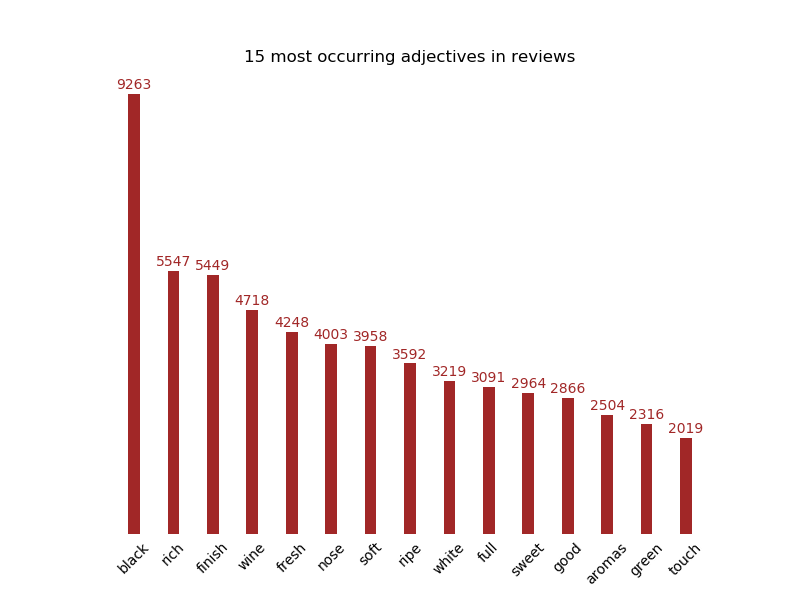

In [96]:
import matplotlib.pyplot as plt
%matplotlib notebook

fig, ax = plt.subplots()
mybars = plt.bar(words, frequency, width = 0.3 ,color='#a12727')
#for i, v in enumerate(frequency):
    #ax.text(v , i , str(v), color='blue', fontweight='bold')
plt.title('15 most occurring adjectives in reviews')
plt.xticks(rotation=45)
plt.yticks(ticks=[])
ax.set(frame_on=False)
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.rcParams.update({'font.size':8})
for bari in mybars:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()+100, str(int(height)),
                 ha='center', color='#a12727', fontsize=8)
plt.show()


# Q. 2 How well are wines from different countries rated?

<IPython.core.display.Javascript object>


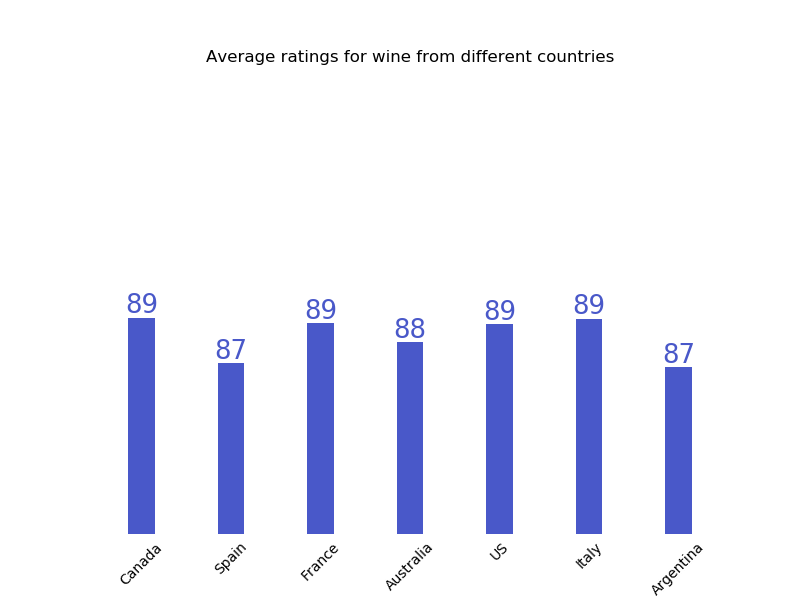

In [97]:
country_ratings = {}

for x in set(df1['country'].to_list()):
    country_ratings[x] = 0

for x in set(df1['country'].to_list()):
    dff = df1[df1['country'] == x]
    dff1 = dff['price']
    dff = dff['points']
    sum_ratings = sum(dff)
    sum_price = sum(dff1)
    avg_ratings = sum_ratings/(len(dff))
    avg_price = sum_price/(len(dff1))
    country_ratings[x] = [avg_ratings,avg_price]
country=[]
avgrating=[]
avgprice=[]
for k in country_ratings.keys():
    country.append(k)
    avgrating.append(country_ratings[k][0])
    avgprice.append(country_ratings[k][1])

fig, ax = plt.subplots()
mybars = plt.bar(country, avgrating, width = 0.3 ,color='#4958c9')
plt.title('Average ratings for wine from different countries')
axes = plt.gca()
axes.set_ylim([80,100])
axes.set(frame_on=False)
axes.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(rotation=45)
plt.yticks(ticks=[])
plt.rcParams.update({'font.size':8})
for bari in mybars:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()+0.2, str(int(height)),
                 ha='center', color='#4958c9', fontsize=15)
plt.show()    

# Q.3 How much quality do wines from every country give per dollar spent?

<IPython.core.display.Javascript object>


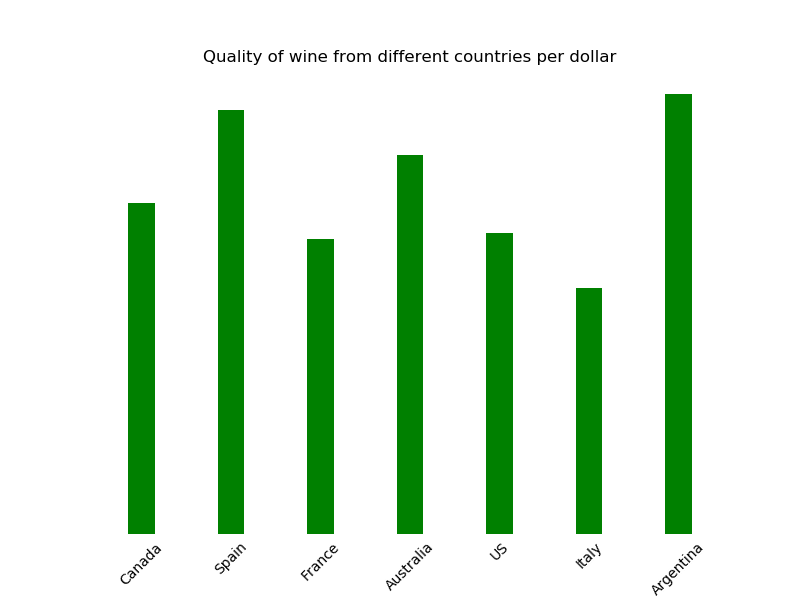

In [89]:
ratingperprice = [avgrating[i]/avgprice[i] for i in range(len(avgprice))]
fig, ax = plt.subplots()
plt.bar(country, ratingperprice, width = 0.3 ,color='green')
plt.title('Quality of wine from different countries per dollar')
axes = plt.gca()
axes.set(frame_on=False)
axes.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(rotation=45)
plt.yticks(ticks=[])
plt.rcParams.update({'font.size':8})
plt.show()   

# Q.4 Which variety of wine tastes the best for the cheapest price?

<IPython.core.display.Javascript object>


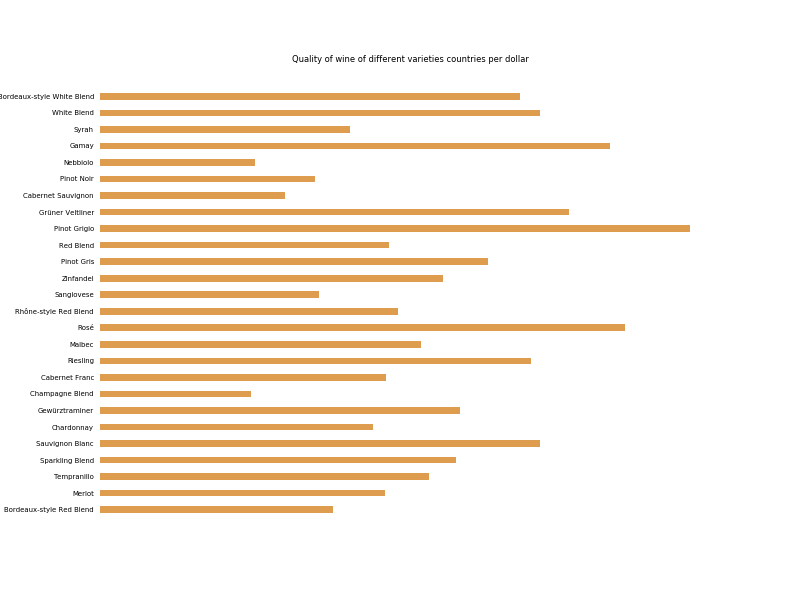

In [99]:
variety_ratings = {}

for x in set(df1['variety'].to_list()):
    variety_ratings[x] = 0

for x in set(df1['variety'].to_list()):
    dff = df1[df1['variety'] == x]
    dff1 = dff['price']
    dff = dff['points']
    sum_ratings = sum(dff)
    sum_price = sum(dff1)
    avg_ratings = sum_ratings/(len(dff))
    avg_price = sum_price/(len(dff1))
    variety_ratings[x] = [avg_ratings,avg_price]
variety=[]
avgrating=[]
avgprice=[]
for k in variety_ratings.keys():
    variety.append(k)
    avgrating.append(variety_ratings[k][0])
    avgprice.append(variety_ratings[k][1])
    

ratingperprice = [avgrating[i]/avgprice[i] for i in range(len(avgprice))]
fig, ax = plt.subplots()
plt.barh(variety, ratingperprice, height=0.4,color='#de9d4e')
plt.title('Quality of wine of different varieties countries per dollar')
axes = plt.gca()


axes.set(frame_on=False)
axes.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(ticks=[])
plt.rcParams.update({'font.size':4})
plt.show()


# Q.5 How many times is every variety of wine reviewed? 

<IPython.core.display.Javascript object>


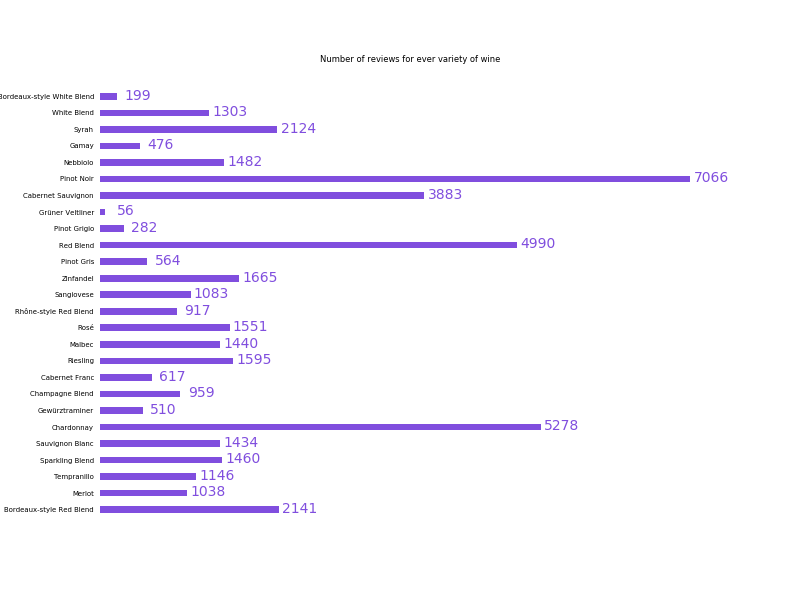

In [100]:
variety_ratings = {}

for x in set(df1['variety'].to_list()):
    variety_ratings[x] = 0

for x in set(df1['variety'].to_list()):
    dff = df1[df1['variety'] == x]
    variety_ratings[x] = len(dff)
variety=[]
avglen=[]
for k in variety_ratings.keys():
    variety.append(k)
    avglen.append(variety_ratings[k])
    


fig, ax = plt.subplots()
mybars = plt.barh(variety, avglen, height=0.4,color='#804ede')
plt.title('Number of reviews for ever variety of wine')
axes = plt.gca()
axes.tick_params(axis=u'both', which=u'both',length=0)
plt.xticks(ticks=[])
axes.set(frame_on=False)
plt.rcParams.update({'font.size':4})
for bari in mybars:
    width = bari.get_width()
    plt.gca().text(bari.get_x() + width + 250, bari.get_y() , str(int(width)),
                 ha='center', color='#804ede', fontsize=8)
plt.show()
